# What is the Periodogram class?

*lightkurve* has a class specifically for dealing with periodograms of time series data. This can be useful for finding the periods of variable stars. Below is a quick example of how to find the period of an eclipsing binary star using *lightkurve*.

Firstly lets grab a light curve file from mast. We'll use KIC 10030943, which is an eclipsing binary observed by the original Kepler mission. We're just going to use one quarter for this demo.

In [1]:
# Obtain the data
from lightkurve import search_lightcurvefile
lc = search_lightcurvefile('10264202', quarter=10).download().PDCSAP_FLUX.remove_nans()

Let's plot the light curve to see what we're working with.

In [3]:
lc.scatter();

This light curve looks like it has some structure in it! Let's use the periodogram class to find the rotation period. You can create a periodogram from the `KeplerLightCurve` object by using the `periodogram` method.

In [10]:
pg = lc.to_periodogram(oversample_factor=1)

Now we can plot the periodogram in the same way that we plot the original light curve.

In [11]:
pg.plot();

This looks like there is a huge signal at a certain frequency! Let's plot it in period space, so that we can see what period the oscillation is occurring at.

In [12]:
pg.plot(view='period', scale='log');

AttributeError: Unknown property view

This looks like a very fast period. Let's find the period with the highest power and fold out light curve.

In [13]:
period = pg.period_at_max_power
print('Best period: {}'.format(period))
lc.fold(period.value).scatter();

Best period: 0.2587311606278735 d


As is quite common for eclipsing binaries with deep secondary eclipses, we have found a harmonic of the period of the eclipsing binary. Let's plot it again with quadruple the period.

In [14]:
period = pg.period_at_max_power * 4
print('Best period: {}'.format(period))
lc.fold(period.value).scatter();

Best period: 1.034924642511494 d


It looks like we could probably get a better fit than this. Let's try increasing the number of points in our periodogram by increasing the `oversample_factor` parameter.

In [15]:
# We set the period range below to slightly reduce the computational time
import astropy.units as u
pg = lc.to_periodogram(minimum_period=0.9*u.day, maximum_period=1.2*u.day, oversample_factor=10)

TypeError: __init__() got an unexpected keyword argument 'maximum_period'

Best period: 1.0350971683913832 d


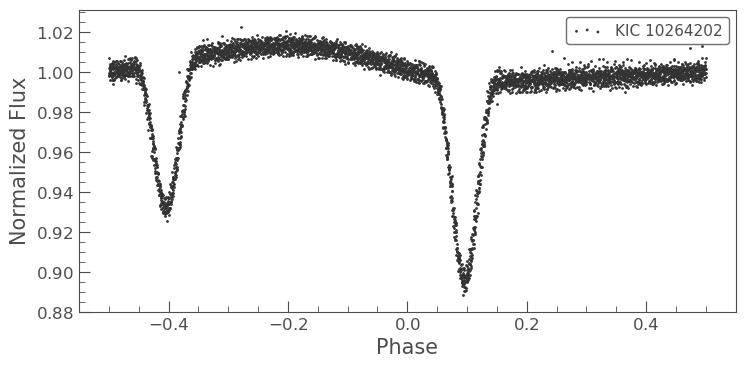

In [9]:
period = pg.period_at_max_power
print('Best period: {}'.format(period))
lc.fold(period.value).scatter();

This has improved our fit! It looks like this eclipsing binary has a period of approximately 1 day.